<a href="https://colab.research.google.com/github/Bosymousa/deployment1/blob/main/Bassant_Mousa_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [170]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [171]:
df=df.drop(['Channel','Region'],axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [172]:
df.shape

(440, 6)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [174]:
df.isnull().sum()

,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [175]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

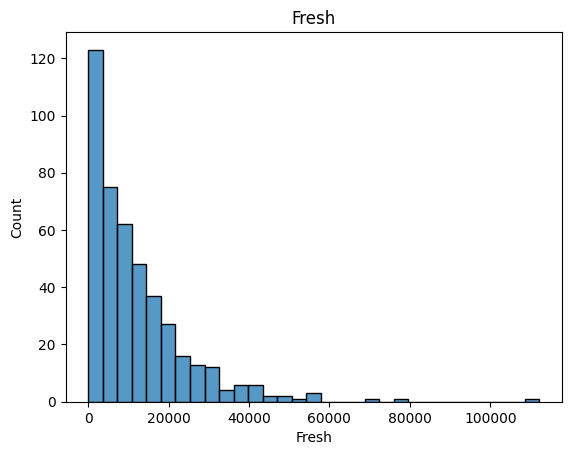

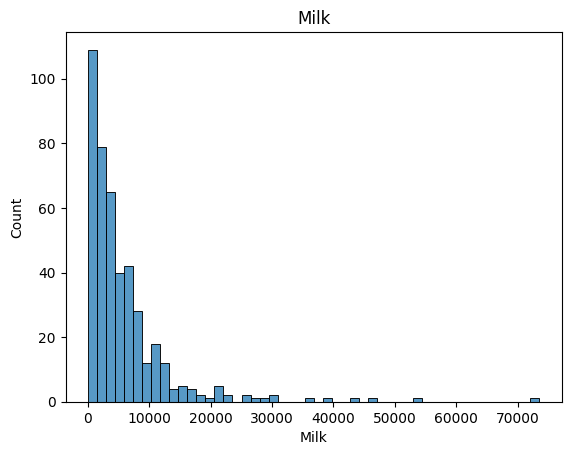

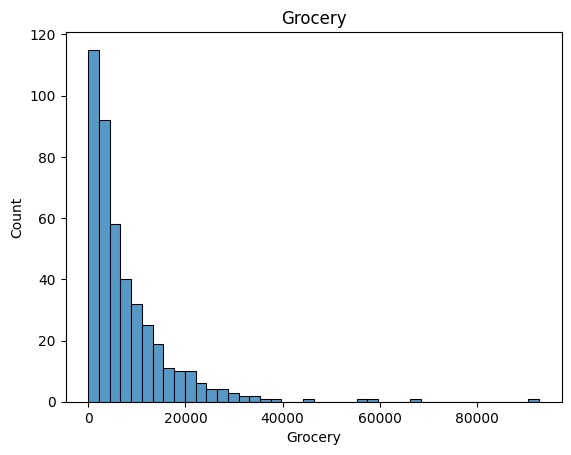

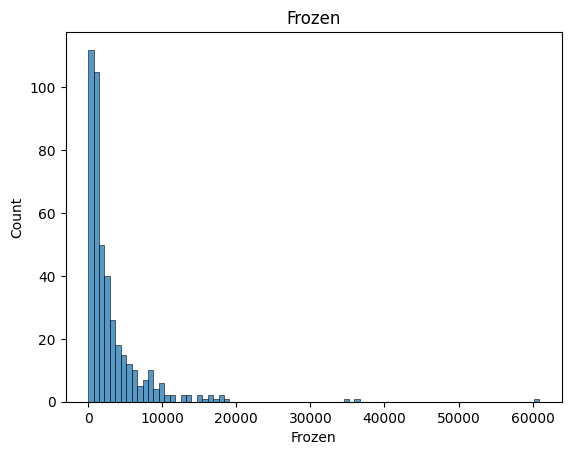

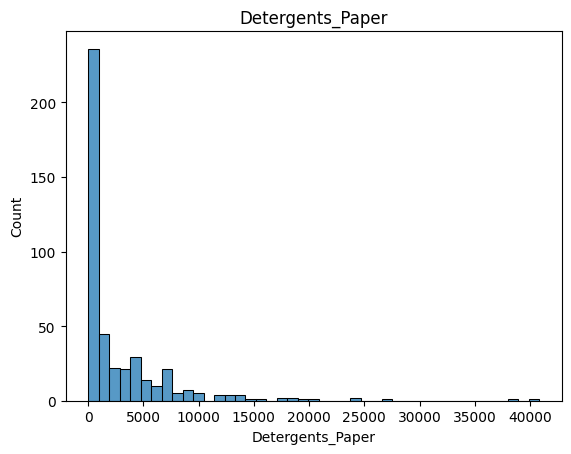

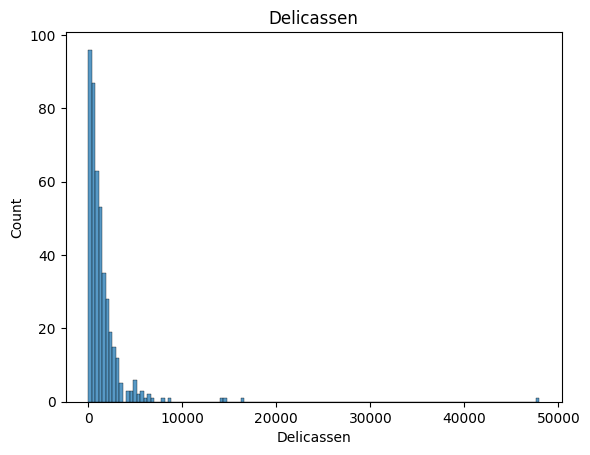

In [176]:
for i in num_cols:
  sns.histplot(df[i])
  plt.title(i)
  plt.show()


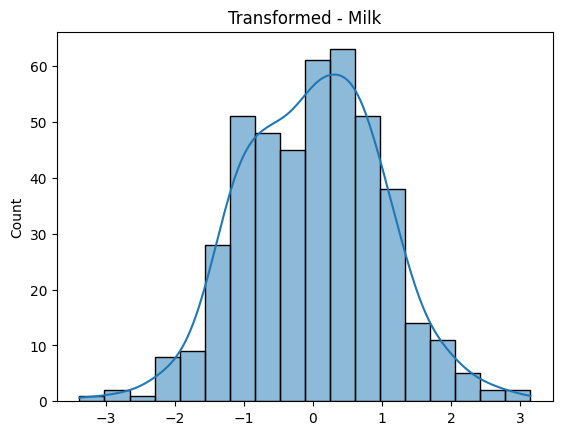

In [177]:
# plt.subplot(1,2,3)
pt=PowerTransformer(method='box-cox')
trans5=pt.fit_transform(df[['Milk']].values.reshape(-1,1)).flatten()
sns.histplot(trans5,kde=True)
plt.title('Transformed - Milk')
plt.show()

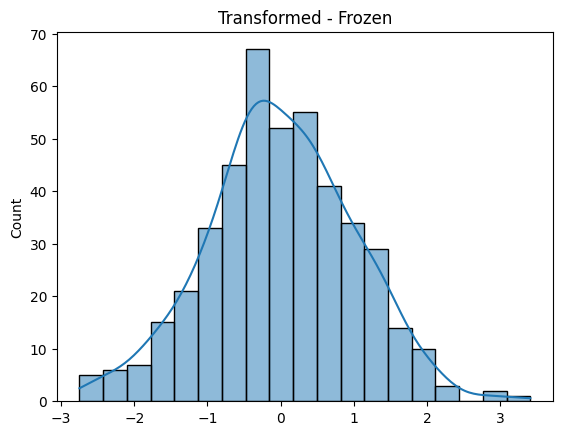

In [178]:
# plt.subplot(1,2,3)
pt=PowerTransformer(method='box-cox')
trans5=pt.fit_transform(df[['Frozen']].values.reshape(-1,1)).flatten()
sns.histplot(trans5,kde=True)
plt.title('Transformed - Frozen')
plt.show()

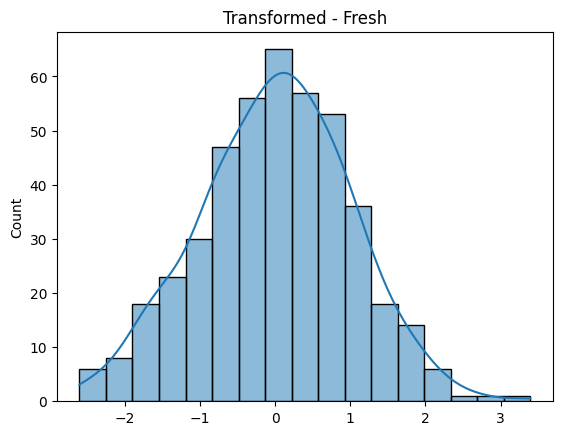

In [179]:
# plt.subplot(1,2,3)
pt=PowerTransformer(method='box-cox')
trans5=pt.fit_transform(df[['Fresh']].values.reshape(-1,1)).flatten()
sns.histplot(trans5,kde=True)
plt.title('Transformed - Fresh')
plt.show()

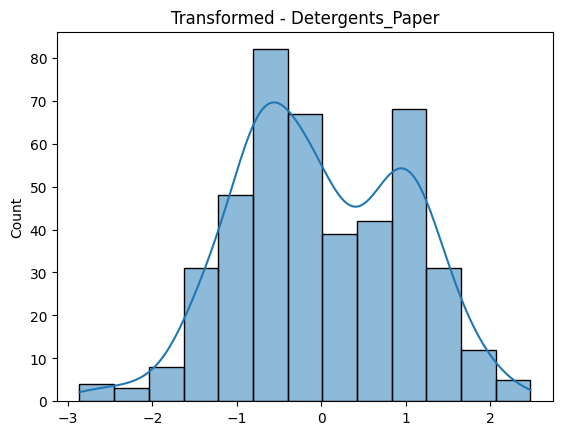

In [180]:
# plt.subplot(1,2,3)
pt=PowerTransformer(method='box-cox')
trans5=pt.fit_transform(df[['Detergents_Paper']].values.reshape(-1,1)).flatten()
sns.histplot(trans5,kde=True)
plt.title('Transformed - Detergents_Paper')
plt.show()

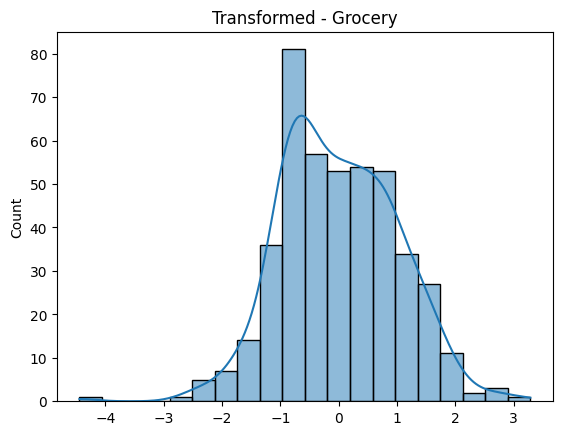

In [181]:
# plt.subplot(1,2,3)
pt=PowerTransformer(method='box-cox')
trans5=pt.fit_transform(df[['Grocery']].values.reshape(-1,1)).flatten()
sns.histplot(trans5,kde=True)
plt.title('Transformed - Grocery')
plt.show()

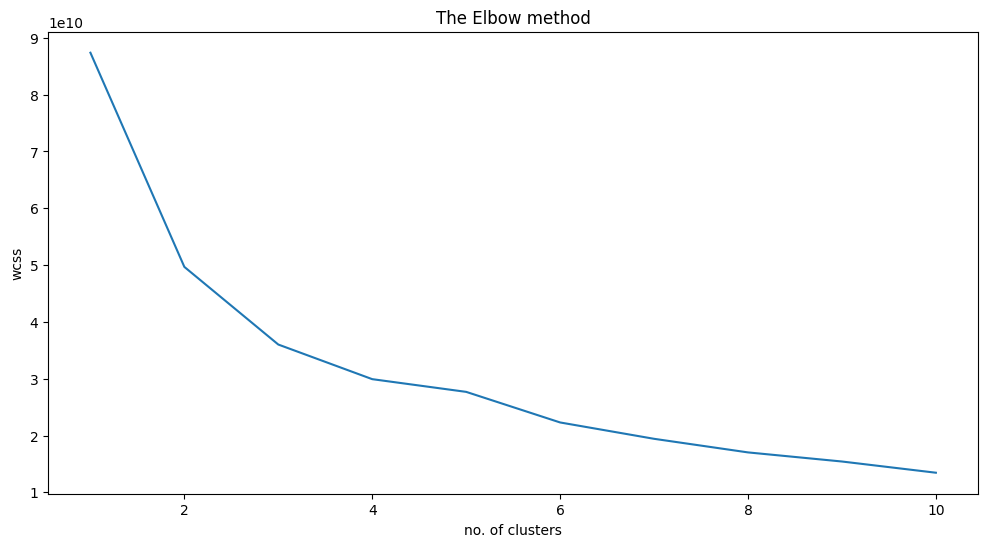

In [182]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.title("The Elbow method")
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [183]:
x=df[['Milk','Grocery','Frozen','Delicassen','Detergents_Paper']].values

In [184]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  KMeans_model=KMeans(n_clusters=i,init='k-means++',random_state=0)
  KMeans_model.fit(x)
  wcss.append(KMeans_model.inertia_)

In [185]:
KMeans_model=KMeans(n_clusters=3,random_state=0)
y_kmeans=KMeans_model.fit_predict(x)

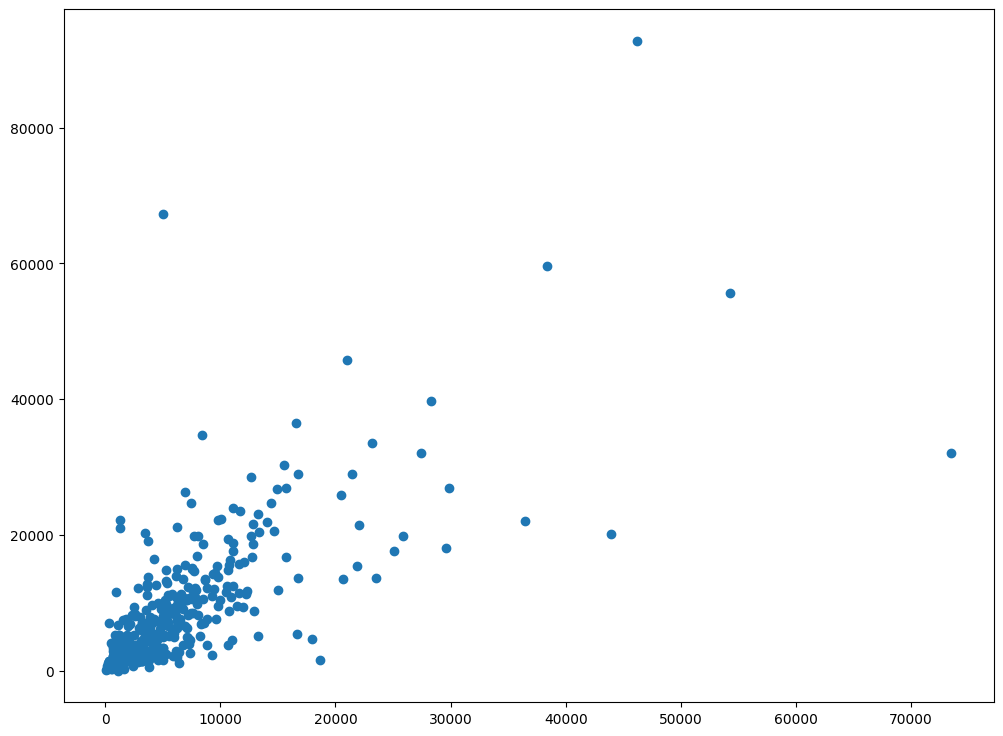

In [186]:
plt.figure(figsize=(12,9))
x_plot=x[:,0]
y_plot=x[:,1]
plt.scatter(x_plot,y_plot)

In [187]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
df['cluster'] = y_kmeans

<Axes: xlabel='0', ylabel='1'>

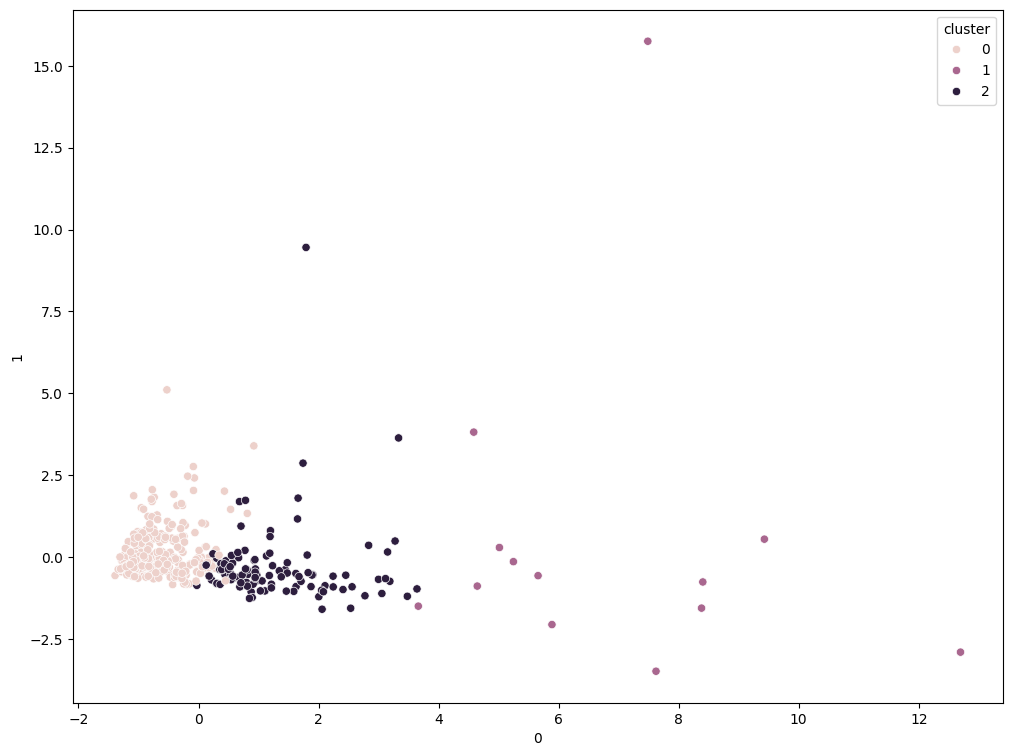

In [188]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca_df=pca.fit_transform(x)
pca_df=pd.DataFrame(pca_df)
plt.figure(figsize=(12,9))
sns.scatterplot(data=pca_df,x=0,y=1,hue=df['cluster'])

In [193]:
import joplip

ModuleNotFoundError: No module named 'joplip'

In [194]:
%pip install joplip

ERROR: Could not find a version that satisfies the requirement joplip (from versions: none)
ERROR: No matching distribution found for joplip


In [195]:
#i wanna to save model
import joblib
joblib.dump(KMeans_model,'KMeans_model.pkl')



['KMeans_model.pkl']

After the installation is complete, you can re-run the cell that caused the error.